Ejercicio 6 - Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import pandas as pd

In [2]:
def plot_curve(history, ind):
# summarize history for loss
    plt.plot(history.history[ind])
    # plt.plot(history.history['val_loss'])
    plt.title(f'model {ind}')
    plt.ylabel(ind)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
rtas = pd.read_csv('ejercicio6.csv')
rtas = rtas.fillna(0).set_index('archivos')
rtas

,accuracy,acc_epoca,loss,epocas,tasa,topologia
archivos,,,,,,
2_clases_simple.csv,0.000000,0.0,0.000000,0.0,0.000,0.0
6_clases_dificil.csv,0.942000,990.0,0.180064,1000.0,0.001,provista por cátedra
circulos.csv,0.996667,861.0,0.093042,1000.0,0.001,provista por cátedra
diabetes.csv,0.838000,914.0,0.363445,1000.0,0.001,"(10-relu),(5-tanh)"
iris.csv,0.940000,835.0,0.265038,1000.0,0.001,provista por cátedra
moons_mis-scaled.csv,0.882500,793.0,0.282066,1000.0,0.001,provista por cátedra
moons.csv,0.830000,965.0,0.397881,1000.0,0.001,provista por cátedra


# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

In [4]:
import tensorflow as tf
import keras
import numpy as np
import utils 
import os
import seaborn as sns

In [5]:
# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
#dataset = "2_clases_simple.csv"
# dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
#dataset = "diabetes.csv"

# Carga del dataset
dataset_path=os.path.join("datasets_clasificacion",dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:-1],data[:,-1]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
# calcula la cantidad de clases
classes=int(y.max()+1)

In [6]:
print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

Información del conjunto de datos:
Ejemplos: 300
Variables de entrada: 2
Cantidad de clases: 2


In [7]:

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()


In [8]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# input_shape solo en la primer capa
# Capa con 3 salidas, activación relu
layer1 = keras.layers.Dense(
    10, 
    input_shape=(d_in,), 
    activation='relu')

# Capa con 5 salidas, activación tanh
layer2 = keras.layers.Dense(
    5, 
    #input_shape=(d_in,),
    activation='tanh'
)

#la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
layer3 = keras.layers.Dense(classes, activation='softmax')

# Creo un modelo logístico
modelo = keras.Sequential([
    layer1,
    layer2, 
    layer3
   ])

Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)





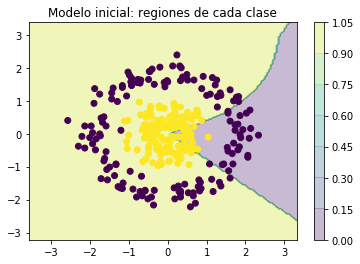

In [9]:
# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo inicial",detail=0.05)

In [10]:

alpha = 0.001
epocas = 1000

modelo.compile(
  optimizer=keras.optimizers.SGD(lr=alpha), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
history = modelo.fit(x,y,epochs=epocas,batch_size=16, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


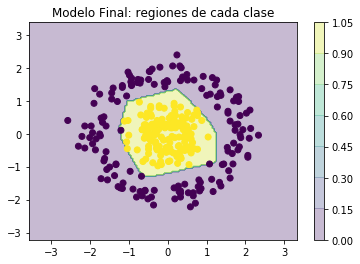

In [11]:
# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo Final",detail=0.05)
    

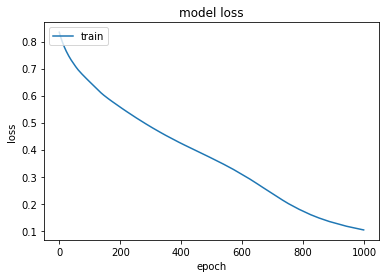

In [12]:
plot_curve(history, 'loss')

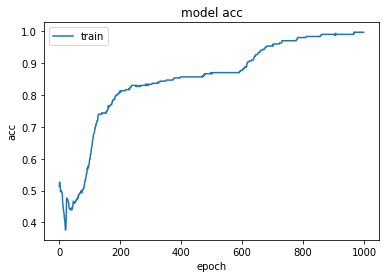

In [13]:
plot_curve(history, 'acc')

In [16]:
acc = pd.Series(history.history['acc'])
acc.idxmax(), acc.max()

(967, 0.9966666666666667)

In [17]:
loss = pd.Series(history.history['loss'])
change_loss = loss.pct_change()
mean_change_loss = change_loss.mean()

In [18]:
loss.iloc[acc.idxmax()], loss.min(), loss.idxmin()

(0.11031762520472209, 0.10297941893339158, 999)

In [19]:
rtas.loc[dataset] = acc.max(), acc.idxmax(), loss.iloc[acc.idxmax()], epocas, alpha, '(10-relu),(5-tanh)'
rtas.loc[dataset]

 accuracy               0.996667
 acc_epoca                   967
 loss                   0.110318
 epocas                     1000
 tasa                      0.001
 topologia    (10-relu),(5-tanh)
Name: circulos.csv, dtype: object

In [229]:
rtas

,accuracy,acc_epoca,loss,epocas,tasa,topologia
archivos,,,,,,
2_clases_simple.csv,0.000000,0.0,0.000000,0.0,0.000,0
6_clases_dificil.csv,0.942000,990.0,0.180064,1000.0,0.001,provista por cátedra
circulos.csv,0.996667,861.0,0.093042,1000.0,0.001,provista por cátedra
diabetes.csv,0.838000,914.0,0.363445,1000.0,0.001,"(10-relu),(5-tanh)"
iris.csv,0.940000,835.0,0.265038,1000.0,0.001,provista por cátedra
moons_mis-scaled.csv,0.882500,793.0,0.282066,1000.0,0.001,provista por cátedra
moons.csv,0.830000,965.0,0.397881,1000.0,0.001,provista por cátedra


- dataset 6 clases-dificil: el problema no es linealmente separable en todos los casos. Aunque puede separar gran parte de las clases correctamente. (una matrix de confusión vendría bien para comprobar)

- dataset moons: 

- dataset moons mis-scaled:

- dataset circulo: el problema no era linealmente separable. el problema queda resuelto con una buena performance comparado a la solución de 1 sola capa.   ( 99 % en epoca 800 aprox. )

- dataset iris: mejoró un poco el accuracy con menos épocas.

- dataset diabetes: mejoró un poco la performance, pero le cambié un poco la capa hidden 1. (le agregué más neuronas)
    

In [230]:
# guardamos las respuestas: 
rtas.to_csv('ejercicio6.csv')